# Machine Learning Fundamental Algorithms

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Test data use for the excersise (simple)

- 1000 samples randomize with math, english scores and extracular
- If the total scores is > 160 or > 140 without extracurricular, the student will count as pass

In [7]:
np.random.seed(0)
n_samples = 1000

math_score = np.random.randint(50, 100, n_samples)
english_score = np.random.randint(50, 100, n_samples)
extracurricular = np.random.randint(0, 2, n_samples)  # 0: No, 1: Yes

passed = ((math_score + english_score) > 160) | ((extracurricular == 1) & ((math_score + english_score) > 140))
passed = passed.astype(int)

## To print out 1000 samples, python uses a well-known middleware called pandas (which imported above)

- pd.DataFrame() Create a board with horizontal as data created above, output as variables "df" showing in the code
- df.head(n) Shows the first n data ( as an preview )

In [10]:
df = pd.DataFrame({
    'math_score': math_score,
    'english_score': english_score,
    'extracurricular': extracurricular,
    'passed': passed
})

df.head(10)

,math_score,english_score,extracurricular,passed
0,94,93,0,1
1,97,96,1,1
2,50,55,1,0
3,53,69,0,0
4,53,97,1,1
5,89,72,0,1
6,59,95,1,1
7,69,61,0,0
8,71,61,1,0
9,86,83,0,1


# To print out as plots, python uses matplot

- create all the cols[] to make a horizontal plot
- in the for loop get both datas and enum to setup the position of the plot correctly
- filtered pass and failed with different colors, labels, add titles, etc...

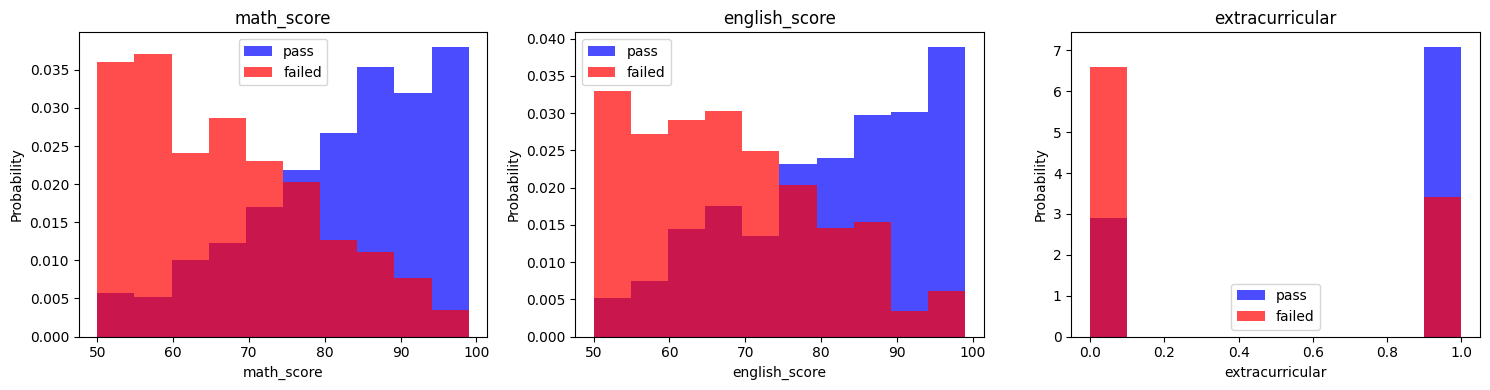

In [13]:
cols = ['math_score', 'english_score', 'extracurricular','passed']

# for label in cols[:-1]:
#     plt.hist(df[df["passed"] == 1][label], color='blue', label='pass', alpha=0.7, density=True)
#     plt.hist(df[df["passed"] == 0][label], color='red', label='failed', alpha=0.7, density=True)
#     plt.title(label)
#     plt.ylabel("Probability")
#     plt.xlabel(label)
#     plt.legend()
#     plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))  

for i, label in enumerate(cols[:-1]): 
    ax = axes[i]
    ax.hist(df[df["passed"] == 1][label], color='blue', label='pass', alpha=0.7, density=True)
    ax.hist(df[df["passed"] == 0][label], color='red', label='failed', alpha=0.7, density=True)
    ax.set_title(label)
    ax.set_xlabel(label)
    ax.set_ylabel("Probability")
    ax.legend()

plt.tight_layout()
plt.show()


## We got all the data, time to train it using different algorithms.

### Train, validation, and test datasets
- The most fundamentals rule of training a data sets is to always seperate some of the data for validate, and test at the end of the training, to have an oversight of the performance ( accuracy and lost) of the training.
- Most common uses are (60, 20, 20) or (80, 10, 10)

In [15]:
from sklearn.model_selection import train_test_split

train, temp = train_test_split(df, test_size=0.4, random_state=42)
valid, test = train_test_split(temp, test_size=0.5, random_state=42)

print(f'Train size: {len(train)}')
print(f'Validation size: {len(valid)}')
print(f'Test size: {len(test)}')

Train size: 600
Validation size: 200
Test size: 200


### A balance and approve-able datasets for studies must have StandardScaler and RandomOverSampler:
- Scaler have all the data in the data sets held the same value as others.
(Ex : Mathscore [0 ->100] but Extracullar [0 -> 1] -> if not scale, extracullar would affect less during the training -> bad training)
- Over Sampling : Helps training works for both losses.

In [19]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler

def scale_dataset(dataframe, oversample = False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)
    
    data = np.hstack((x, np.reshape(y, (-1,1))))

    return data, x , y

In [20]:
train, x_train, y_train = scale_dataset(train,oversample = True)
valid, x_valid, y_valid = scale_dataset(valid,oversample = True)
test, x_test, y_test = scale_dataset(test,oversample = True)

In [21]:
sum(y_train == 1)

np.int64(324)

# KNN

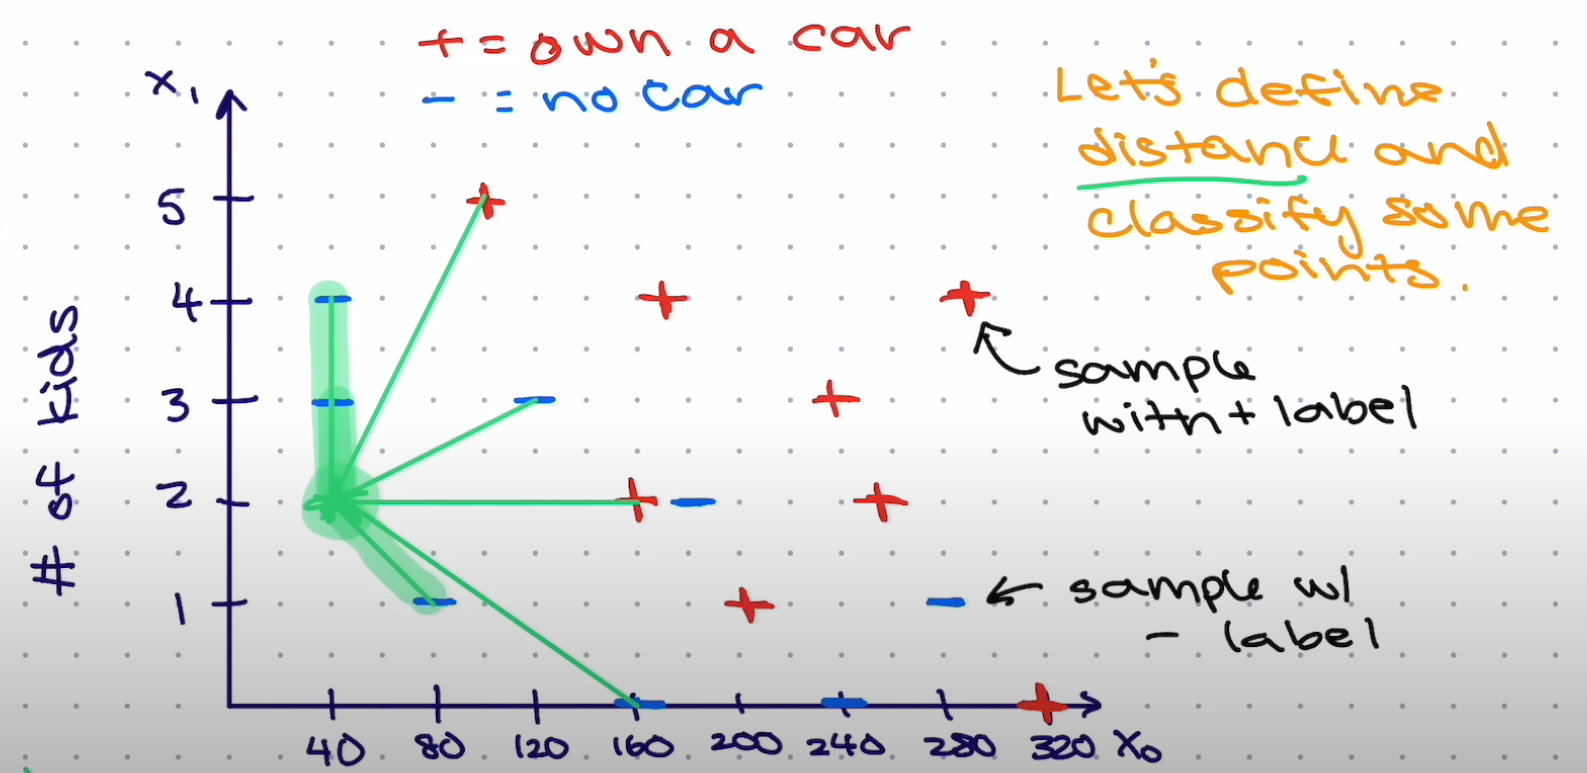
K - Nearest Neightbor 
- An algorithmn uses surrounding datas (n - dimensions based on data's given), and calculate the nearest spot, to give the most accurate prediction

- Pros:
+ No need training, raw data.

- Cons:
+ Outlier cause inaccuracy, only works with accurate data with least outlier.

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       107
           1       0.98      0.93      0.96       107

    accuracy                           0.96       214
   macro avg       0.96      0.96      0.96       214
weighted avg       0.96      0.96      0.96       214



# Naive Bayes

In [92]:
from sklearn.naive_bayes import GaussianNB

In [93]:
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

GaussianNB()

In [94]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       111
           1       0.96      1.00      0.98       111

    accuracy                           0.98       222
   macro avg       0.98      0.98      0.98       222
weighted avg       0.98      0.98      0.98       222



# Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [97]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       111
           1       0.97      1.00      0.98       111

    accuracy                           0.98       222
   macro avg       0.98      0.98      0.98       222
weighted avg       0.98      0.98      0.98       222



# SVM

In [99]:
from sklearn.svm import SVC

In [100]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [101]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       111
           1       0.97      1.00      0.98       111

    accuracy                           0.98       222
   macro avg       0.98      0.98      0.98       222
weighted avg       0.98      0.98      0.98       222



# Neural Net